#AI Course Final Project

In [ ]:
!pip uninstall umap
!pip install umap-learn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import unittest
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
%matplotlib inline
import umap.umap_ as umap
reducer = umap.UMAP()
from sklearn.preprocessing import MinMaxScaler
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM


%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 9, 5
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

def run_tests():
  unittest.main(argv=[''], verbosity=1, exit=False)

In [2]:
plt.figure(figsize=(7, 7))

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

In [3]:
train_df = pd.read_csv('/content/LSTM.csv',header = 0, error_bad_lines=False)

In [4]:
train_df.describe()

,Date,FinalPrice,High,Low,Final,Value,Volume,Number,LastDayPrice,LastPrice
count,3.062000e+03,3062.000000,3062.000000,3062.000000,3062.000000,3.062000e+03,3.062000e+03,3062.000000,3062.000000,3062.000000
mean,2.013895e+07,3676.780209,3735.476813,3607.612345,3676.746897,3.456574e+11,4.235528e+07,4230.084259,3669.261594,3669.058459
std,4.021614e+04,3234.136137,3311.481509,3131.285734,3223.207525,1.376583e+12,1.176606e+08,14264.225823,3218.360362,3218.876410
min,2.007031e+07,1000.000000,1007.000000,950.000000,1001.000000,6.591940e+05,1.210000e+02,2.000000,1001.000000,1000.000000
25%,2.010105e+07,1972.250000,1995.000000,1942.000000,1966.000000,8.182500e+09,3.335122e+06,325.000000,1965.000000,1960.250000
50%,2.014051e+07,2888.500000,2912.000000,2850.000000,2883.500000,2.510000e+10,1.004414e+07,743.500000,2879.500000,2872.500000
75%,2.017110e+07,4250.000000,4321.250000,4189.500000,4280.500000,9.585000e+10,3.082606e+07,1925.500000,4275.250000,4260.000000
max,2.021021e+07,23400.000000,24820.000000,22900.000000,23640.000000,2.010000e+13,3.830000e+09,222795.000000,23640.000000,23270.000000


In [5]:
train_df.head()

,Name,FormattedDate,Date,FinalPrice,High,Low,Final,Value,Volume,Number,Per,LastDayPrice,LastPrice
0,S*Mobarakeh.Steel,2021-02-14,20210214,12750,13190,12400,12770,2.770000e+12,217000000.0,26560,D,12580,12570
1,S*Mobarakeh.Steel,2021-02-13,20210213,12580,12580,12580,12580,1.080000e+12,86221150.0,4956,D,11870,12580
2,S*Mobarakeh.Steel,2021-02-09,20210209,11680,11900,11480,11870,8.780000e+11,73986789.0,7898,D,11340,11900
3,S*Mobarakeh.Steel,2021-02-08,20210208,11350,11350,11150,11340,1.800000e+12,158000000.0,14612,D,10810,11350
4,S*Mobarakeh.Steel,2021-02-07,20210207,10800,10810,10500,10810,3.950000e+11,36586710.0,4029,D,10300,10810


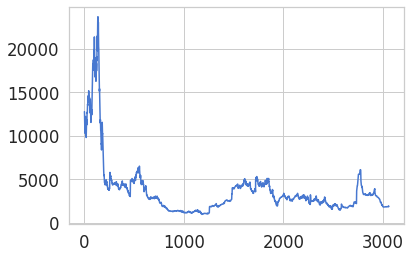

In [6]:
train_df['Final'].plot();

In [7]:
space=np.asarray(train_df['Final'].iloc[::-1])

In [8]:
trainspace = space[:2587]
validspace = space[2587:]

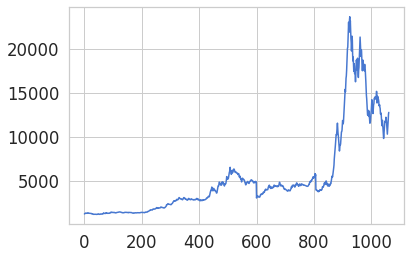

In [9]:
plt.plot(space[2000:])

In [10]:
space[3041:3062]

array([10840, 10320,  9810, 10200, 10680, 11210, 11620, 11790, 11680,
       11670, 12220, 12090, 11750, 11230, 10780, 10300, 10810, 11340,
       11870, 12580, 12770])

In [11]:
#Data until 20Jan(30 Day)

MainData=space[:3045]

In [12]:
MainData[3040:3045]

array([11300, 10840, 10320,  9810, 10200])

## Mean Average

In [13]:
# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component.
#So here we have set the last year’s data into validation and the 4 years’ data before that into train set.

# splitting into train and validation
train = MainData[:2587]
valid = MainData[2587:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train[len(train)-150+i:].sum() + sum(preds)
    b = a/150
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid)-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 Shape of training set:
(2587,)

 Shape of validation set:
(458,)

 RMSE value on validation set:
8129.877702183241


In [ ]:
preds

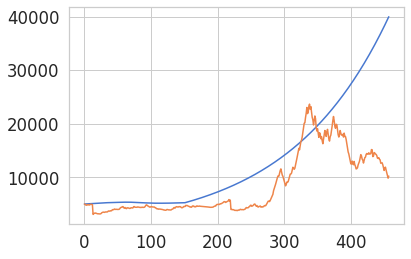

In [15]:
#plt.plot(train)
plt.plot(preds)
plt.plot(valid)

In [ ]:
MainData=MainData.reshape(MainData.size,1)

In [ ]:
MainData.shape

(3045, 1)

## Data Preprocess

In [ ]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df2 = pd.read_csv('/content/NSE-TATAGLOBAL11.csv')

#print the head
df2.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [ ]:
df2.head(15)

In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df2.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df2)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)


In [ ]:
new_data.shape

In [ ]:

#creating train and test sets
dataset = new_data.values

train2 = dataset[0:987,:]
valid2 = dataset[987:,:]

In [ ]:
train2.shape

(987, 1)

In [ ]:
valid2.shape

(248, 1)

##LSTM

In [ ]:
train=train.reshape(train.size,1)
valid=valid.reshape(valid.size,1)

In [ ]:
train.shape

(2587, 1)

In [ ]:
valid.shape

(458, 1)

In [ ]:
valid[450:458]

array([[11260],
       [11780],
       [11870],
       [11300],
       [10840],
       [10320],
       [ 9810],
       [10200]])

In [ ]:
space=space.reshape(space.size,1)

In [ ]:

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(MainData)

xtrain, ytrain = [], []
for i in range(60,len(train)):
    xtrain.append(scaled_data[i-60:i,0])
    ytrain.append(scaled_data[i,0])
xtrain, ytrain = np.array(xtrain), np.array(ytrain)

xtrain = np.reshape(xtrain, (xtrain.shape[0],xtrain.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(xtrain.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))   

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(xtrain, ytrain, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = MainData[len(MainData) - len(valid) - 60:]
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

Xtest = []
for i in range(60,inputs.shape[0]):
    Xtest.append(inputs[i-60:i,0])
Xtest = np.array(Xtest)

Xtest = np.reshape(Xtest, (Xtest.shape[0],Xtest.shape[1],1))
closing_price = model.predict(Xtest)
closing_price = scaler.inverse_transform(closing_price)

2527/2527 - 51s - loss: 1.1853e-04


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

809.0136680518078

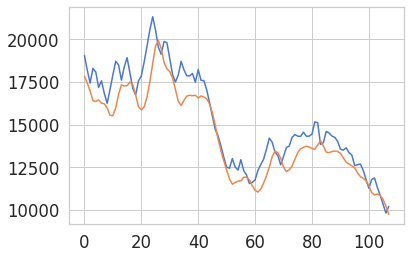

In [ ]:
plt.plot(valid[350:])
plt.plot(closing_price[350:])
#plt.plot(closing_price2)

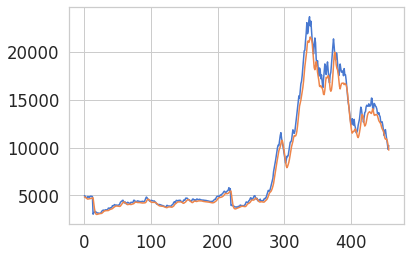

In [ ]:
plt.plot(valid)
plt.plot(closing_price)
#plt.plot(closing_price2)

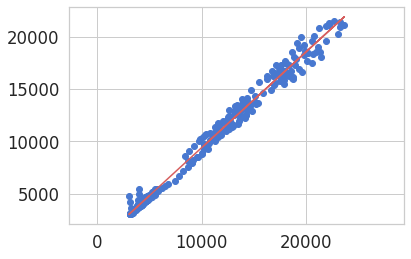

In [ ]:
x=valid
y=closing_price
plt.scatter(x,y)
plt.axis('equal')
z = np.polyfit(x.reshape(x.size), y.reshape(y.size), 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")

plt.show()

In [ ]:
"""make last 60 days as feature for 'space' matrix to use as real-time predicting"""
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaledspace = scaler.fit_transform(space)
Ex = []
for i in range(3045,scaledspace.shape[0]):
    Ex.append(scaledspace[i-60:i,0])
Ex = np.array(Ex)

Ex = np.reshape(Ex, (Ex.shape[0],Ex.shape[1],1))

###Checking

In [ ]:
T=Ex.reshape(17,60,1)

In [ ]:
closing_price2 = model.predict(T)

In [ ]:
closing_price2 = scaler.inverse_transform(closing_price2)

In [ ]:
space[3045:].shape

(17, 1)

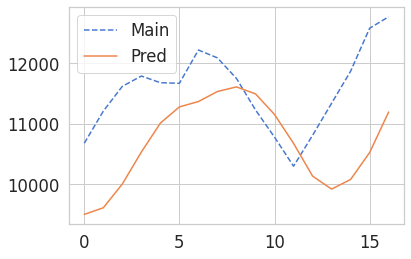

In [ ]:
plt.plot(space[3045:],ls='--',label='Main')
plt.plot(closing_price2,label='Pred')
plt.legend(loc='best')
plt.show()

##PROPHET

In [ ]:
import pandas as pd
from fbprophet import Prophet


In [ ]:
Prophetdata = [train_df['FormattedDate'], train_df['Final']]

headers = ["ds", "y"]

df3 = pd.concat(Prophetdata, axis=1, keys=headers)


In [ ]:
m = Prophet()
m.fit(df3)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
3117,2021-04-11
3118,2021-04-12
3119,2021-04-13
3120,2021-04-14
3121,2021-04-15


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3117,2021-04-11,13772.624940,11462.175726,16034.280618
3118,2021-04-12,13813.690335,11754.840100,15735.457591
3119,2021-04-13,13825.983934,11619.901878,15997.973801
3120,2021-04-14,13813.990335,11717.036556,15869.837633
3121,2021-04-15,13494.334836,11429.179158,15675.747975


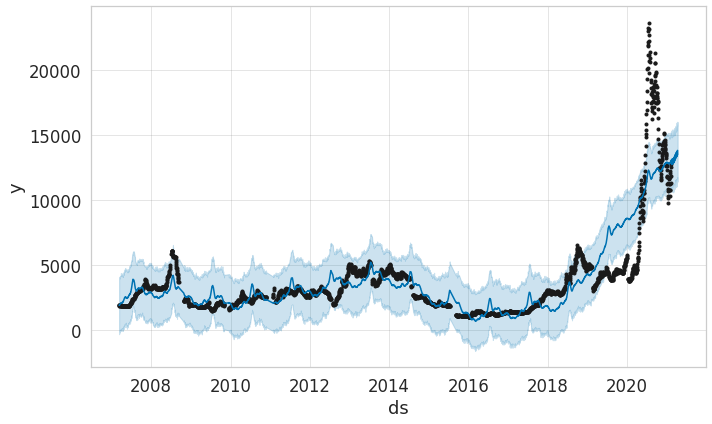

In [ ]:
fig1 = m.plot(forecast)

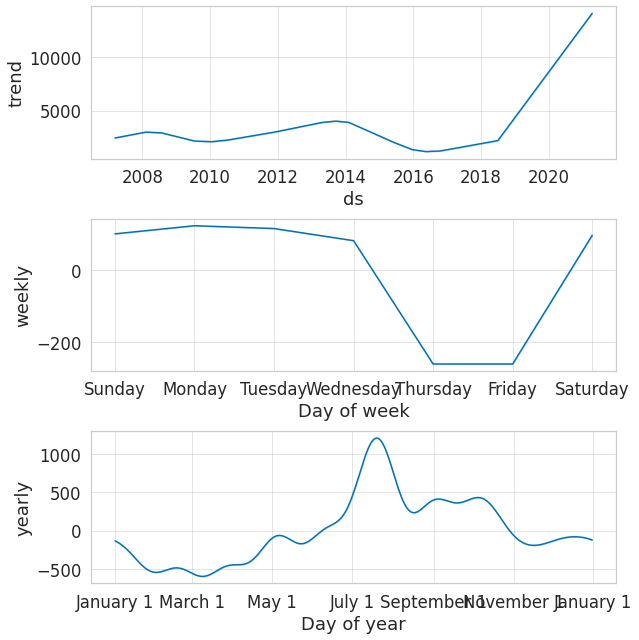

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
m = Prophet()
m.fit(df3[:600])
future = m.make_future_dataframe(periods=30)
future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
625,2021-03-12
626,2021-03-13
627,2021-03-14
628,2021-03-15
629,2021-03-16


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
625,2021-03-12,10057.597602,8783.868946,11195.127325
626,2021-03-13,8853.317300,7571.146025,10037.351604
627,2021-03-14,8888.750203,7711.184799,10132.229025
628,2021-03-15,8810.828339,7561.060176,10078.082215
629,2021-03-16,8785.848061,7496.872347,10062.797717


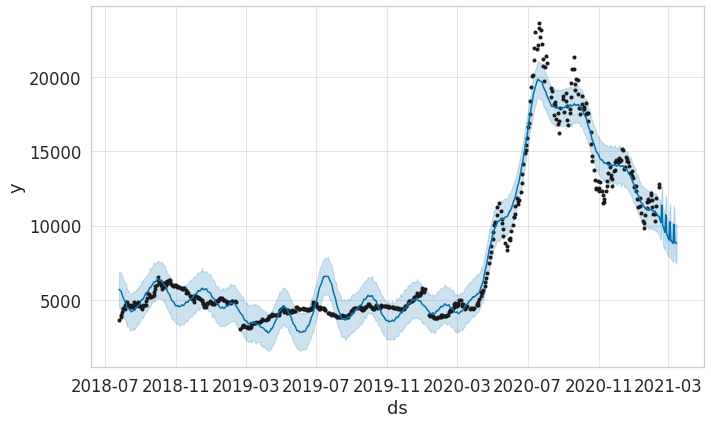

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
RealData = [0] * 630


In [ ]:
RealData[595:603]=[10810,11350,11900,12850,12570,12540,12470,12200]

In [ ]:
forecast['RealData']=RealData

In [ ]:
 forecast[['ds','trend','RealData']].iloc[595:603]

,ds,trend,RealData
595,2021-02-07,13009.985245,10810
596,2021-02-08,12990.819926,11350
597,2021-02-09,12971.654606,11900
598,2021-02-13,12894.993326,12850
599,2021-02-14,12875.828007,12570
600,2021-02-15,12856.662687,12540
601,2021-02-16,12837.497367,12470
602,2021-02-17,12818.332047,12200


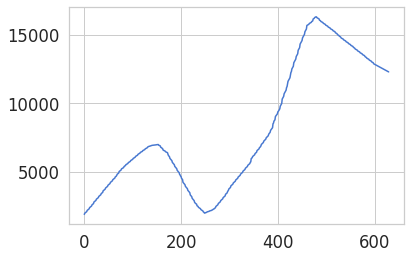

In [ ]:
plt.plot(forecast['trend'])